<a href="https://colab.research.google.com/github/minnjeee/SWcamp/blob/main/12_%EB%94%A5%EB%9F%AC%EB%8B%9D/ex05)_%EB%94%A5%EB%9F%AC%EB%8B%9D_%ED%8C%A8%EC%85%98_%EC%9D%B4%EB%AF%B8%EC%A7%80_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 목표
- 10종류의 패션 이미지 데이터를 분류하는 신경망 모델을 만들어보자!

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# keras에서 지원하는 패션 이미지 데이터 임포트
from tensorflow.keras.datasets import fashion_mnist

In [ ]:
data = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
data

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [ ]:
(X_train, y_train), (X_test, y_test) = data

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

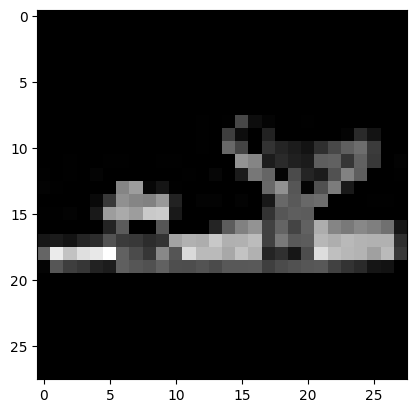

In [ ]:
plt.imshow(X_train[59999], cmap='gray')

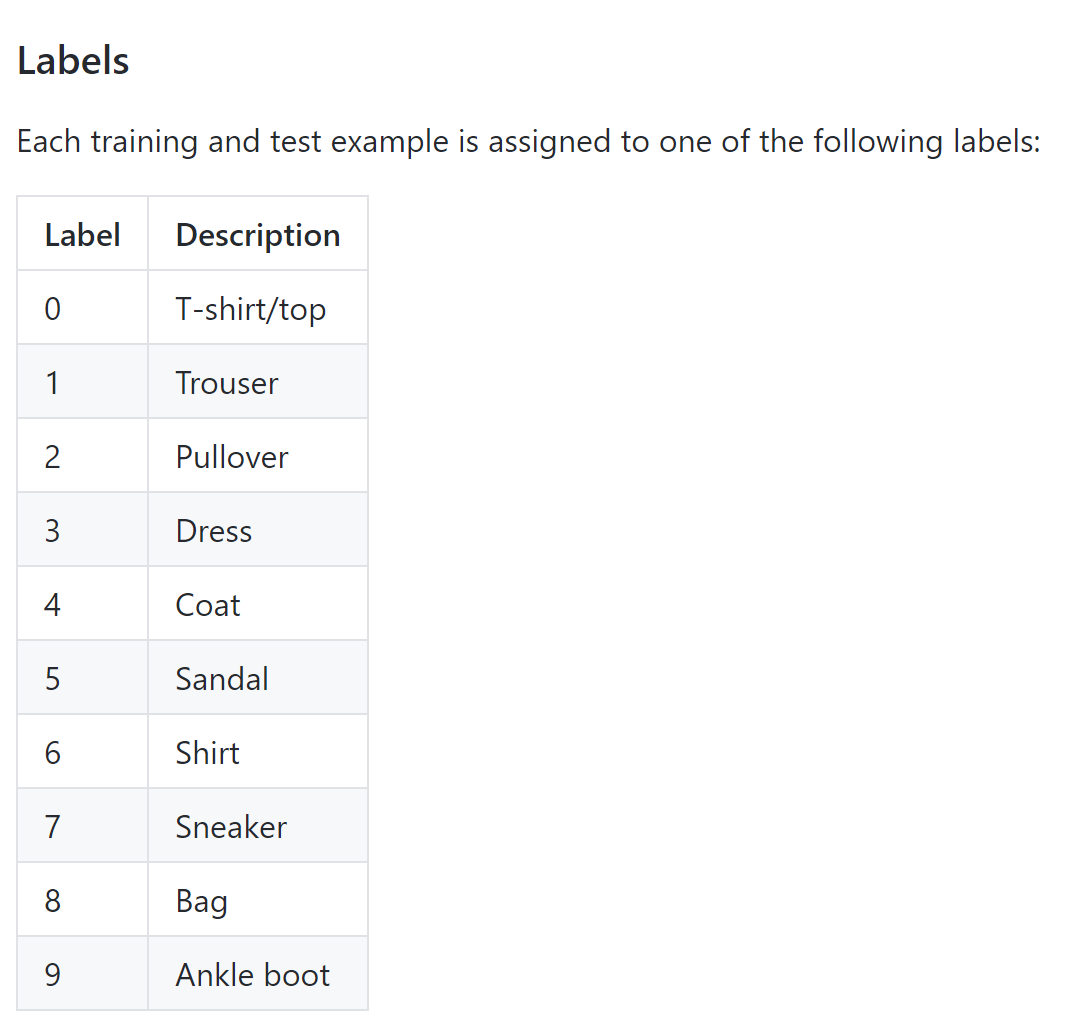

In [ ]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
# X_train = X_train.reshape(60000,784)
# X_test = X_test.reshape(10000,784)

# X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [ ]:
y_train_onehot = pd.get_dummies(y_train)
y_test_onehot = pd.get_dummies(y_test)

y_train_onehot.shape, y_test_onehot.shape

((60000, 10), (10000, 10))

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_val, y_train_onehot, y_val_onehot = train_test_split(X_train, y_train_onehot, random_state=33)

In [ ]:
X_train.shape, X_val.shape, y_train_onehot.shape, y_val_onehot.shape

((45000, 28, 28), (15000, 28, 28), (45000, 10), (15000, 10))

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
# Flatten : 신경망에 데이터를 넣을 때 자동으로 1차원으로 펴주는 함수

In [ ]:
model = Sequential()

# 신경망에 들어가기 전 Flatten을 통해 데이터를 1차원으로 펴주기
model.add(Flatten(input_shape=(28,28))) # 학습데이터를 reshape하지 않아도 됨!

model.add(Dense(500, activation='sigmoid'))
model.add(Dense(300, activation='sigmoid'))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(30, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['acc'])

In [ ]:
h = model.fit(X_train, y_train_onehot, epochs=30,
              batch_size=128,
              validation_data=(X_val, y_val_onehot)
              )

Epoch 1/30
352/352 [==============================] - 5s 6ms/step - loss: 1.2009 - acc: 0.6147 - val_loss: 0.8383 - val_acc: 0.7006
Epoch 2/30
352/352 [==============================] - 2s 5ms/step - loss: 0.7710 - acc: 0.7083 - val_loss: 0.7383 - val_acc: 0.7184
Epoch 3/30
352/352 [==============================] - 2s 5ms/step - loss: 0.7289 - acc: 0.7177 - val_loss: 0.7190 - val_acc: 0.7223
Epoch 4/30
352/352 [==============================] - 2s 5ms/step - loss: 0.7004 - acc: 0.7246 - val_loss: 0.7146 - val_acc: 0.7138
Epoch 5/30
352/352 [==============================] - 2s 5ms/step - loss: 0.6918 - acc: 0.7275 - val_loss: 0.6913 - val_acc: 0.7220
Epoch 6/30
352/352 [==============================] - 2s 7ms/step - loss: 0.6756 - acc: 0.7381 - val_loss: 0.6670 - val_acc: 0.7469
Epoch 7/30
352/352 [==============================] - 3s 8ms/step - loss: 0.6535 - acc: 0.7522 - val_loss: 0.6692 - val_acc: 0.7484
Epoch 8/30
352/352 [==============================] - 2s 5ms/step - loss: 0.

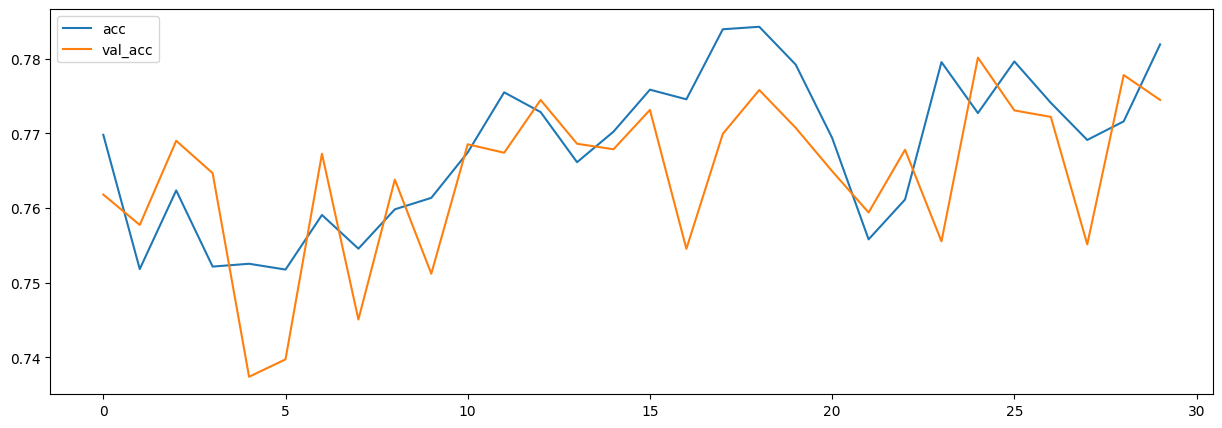

In [ ]:
plt.figure(figsize=(15,5))

plt.plot(h.history['acc'], label='acc')
plt.plot(h.history['val_acc'], label='val_acc')
plt.legend()
plt.show()

In [ ]:
model.evaluate(X_test, y_test_onehot)

313/313 [==============================] - 1s 3ms/step - loss: 0.5980 - acc: 0.7692


[0.5980468392372131, 0.7692000269889832]

### 앞선 손글씨 이미지 데이터와 동일한 형태의 데이터를 동일한 구조로 학습시켰지만 정확도가 차이나는 이유는 패션 이미지 데이터의 복잡도가 더 높았기 때문!!